In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import DoubleModeSystem, plot_full_evolution
import numpy as np

[[-9.42477796e-03  6.28318531e+00  0.00000000e+00  1.25663706e-02]
 [-6.28318531e+00 -9.42477796e-03 -1.25663706e-02  0.00000000e+00]
 [ 0.00000000e+00  1.25663706e-02 -2.19911486e-02  1.25663706e+01]
 [-1.25663706e-02  0.00000000e+00 -1.25663706e+01 -2.19911486e-02]]


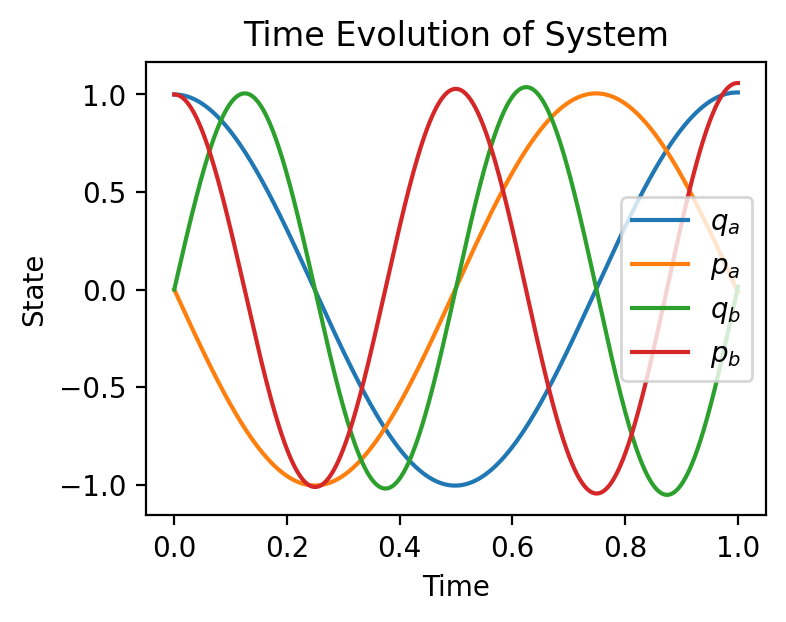

In [3]:
sys = DoubleModeSystem(params={})
x_0 = np.array([1,0,0,1])
ts = np.linspace(0, 1, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$","$q_b$","$p_b$"])
ax.legend()

print(sys.A)

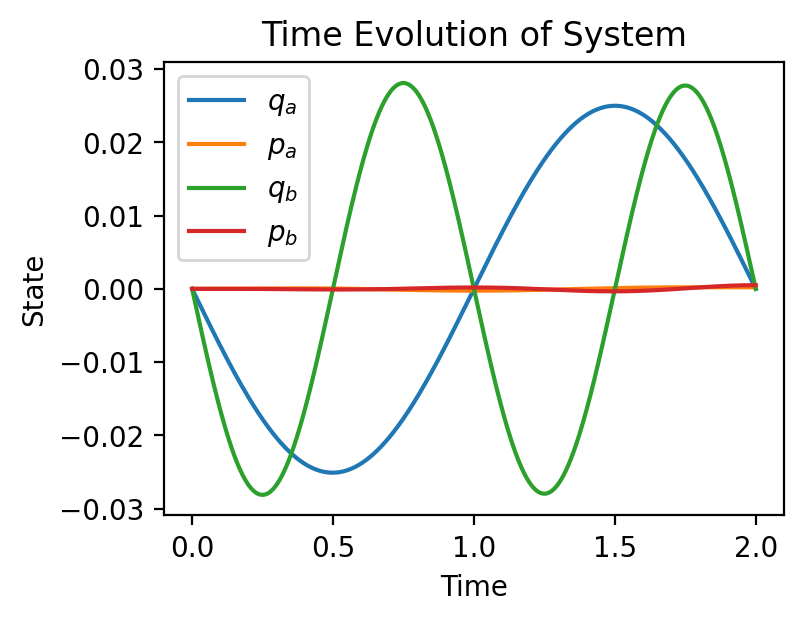

In [4]:
#default A_in, B_in is used
omega_a = 1*np.pi*1
A_in = lambda t: np.exp(1.0j*(omega_a*t))
omega_b = 2*np.pi*1
B_in = lambda t: np.exp(1.0j*(omega_b*t))
sys = DoubleModeSystem(params={"omega_a":omega_a,"omega_b":omega_b},A_in=A_in, B_in=B_in)
x_0 = np.array([0,0,0,0])
ts = np.linspace(0, 2, 10001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$","$q_b$","$p_b$"])
ax.legend()

In [5]:
u = sys.eval_u(0)
sys.eval_Jf(x_0, u)

array([[-0.00942478,  3.14159265,  0.        ,  0.01256637],
       [-3.14159265, -0.00942478, -0.01256637,  0.        ],
       [ 0.        ,  0.01256637, -0.02199115,  6.28318531],
       [-0.01256637,  0.        , -6.28318531, -0.02199115]])

In [6]:
sys.eval_Jf_numerical(x_0, u)

array([[-0.00942478,  3.14159265,  0.        ,  0.01256637],
       [-3.14159265, -0.00942478, -0.01256637,  0.        ],
       [ 0.        ,  0.01256637, -0.02199115,  6.28318531],
       [-0.01256637,  0.        , -6.28318531, -0.02199115]])

# Linearization

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


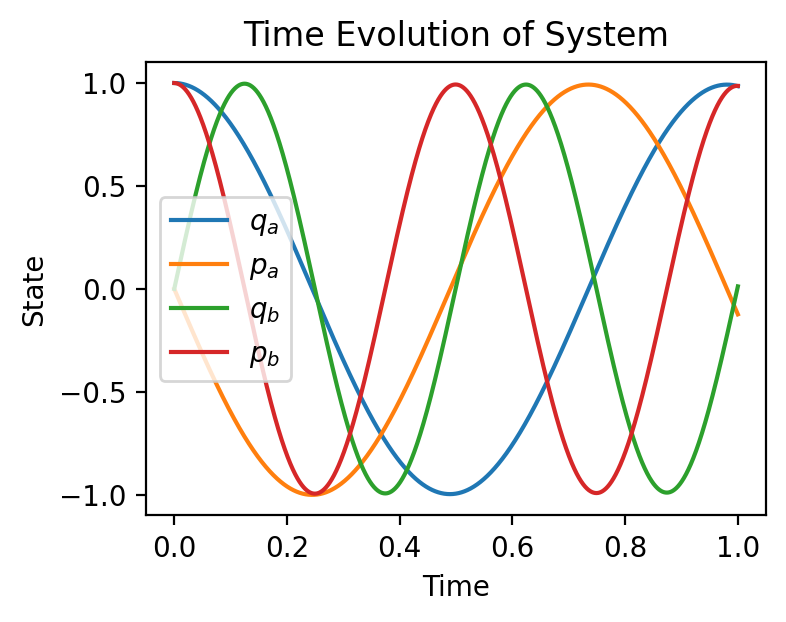

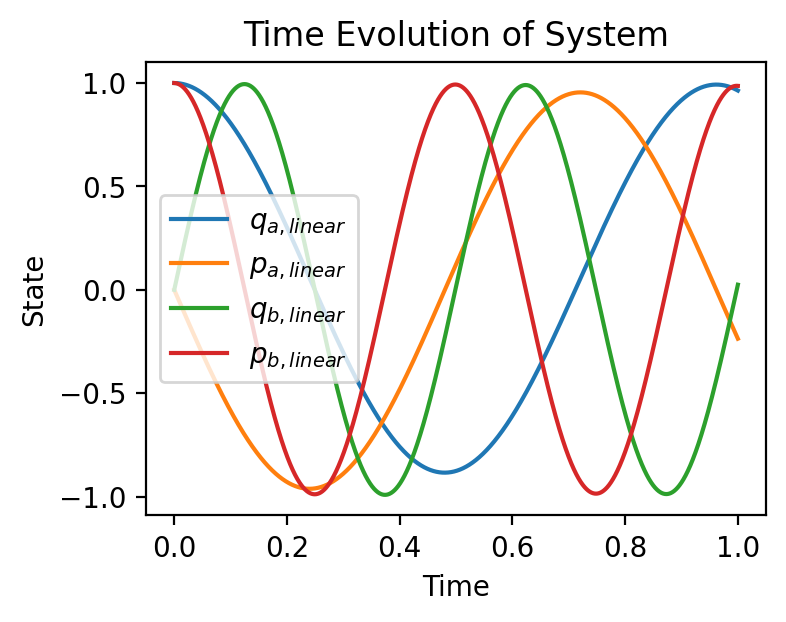

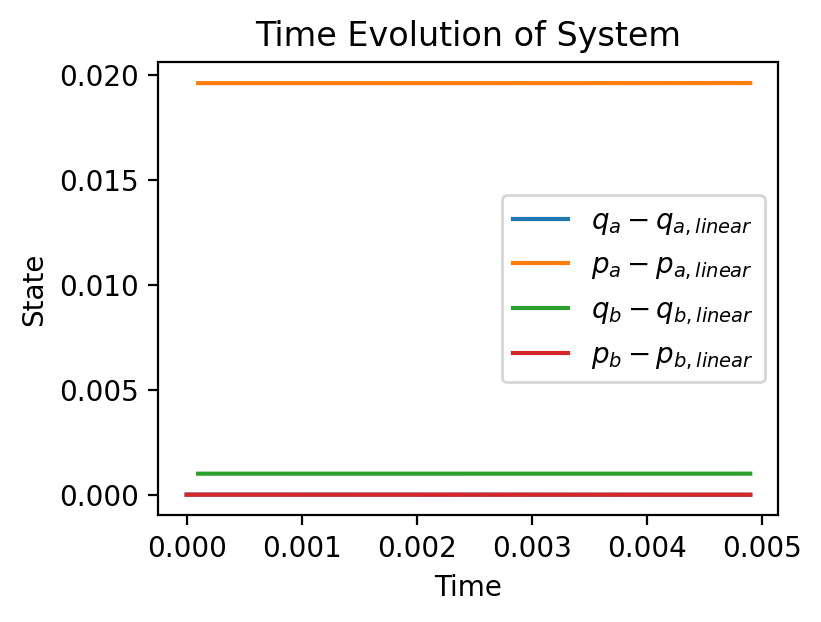

In [7]:
A_in = lambda t: 0
B_in = lambda t: 0
sys = DoubleModeSystem(params={"omega_a": 2*np.pi*1, "kappa_a": 2*np.pi*0.001, "kerr_a":2*np.pi*0.01}, A_in = A_in, B_in = B_in)
x_0 = np.array([1,0, 0 , 1])
ts = np.linspace(0, 1, 10001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$", "$q_b$","$p_b$"])
ax.legend()

X_linear = sys.forward_euler_linear(x_0, ts, x_0, 0)
fig, ax = plot_full_evolution(X_linear, ts, labels=["$q_{a,linear}$","$p_{a,linear}$","$q_{b,linear}$","$p_{b,linear}$"])

Delta_X = (X-X_linear)/X
plot_full_evolution(Delta_X[:,:50], ts[:50], labels=["$q_a - q_{a,linear}$","$p_a - p_{a,linear}$","$q_b - q_{b,linear}$","$p_b - p_{b,linear}$"])
ax.legend()